test2
andrew y ernesto

In [75]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("testing")

testing


In [76]:
dataset = pd.read_excel("Data_Train.xlsx")
#print(dataset.describe(include='all'))
print(dataset.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [77]:
# Función que convierte los datos no numéricos de
# la propiedad "Total_Stops" en numéricos.
# Entrada: stringDtype; Salida: integer
def uniform_stops(data):
    if type(data) == float: # De ser un dato vacío,
        data = 0 # Asigna una cantidad de 0 horas.
    elif type(data) != np.int64: # De ser el dato un string,
        # inicia el ciclo.
        if data == "non-stop": # Si "non-stop",
            data = 0 # Guarda el número de paradas como 0
        else: # Sino,
            data = int(data[0]) # Guarda el número de paradas que corresponde
            # al primer dígito del dato.
    return data
# Función que convierte los datos no numéricos de
# la propiedad "Duration" en numéricos.
# Entrada: stringDtype; Salida: integer
def uniform_duration(data):
    if data.find("m") == -1: # Dato con formato “#h”
        [horas] = data.split(" ") # Asigna a "horas"
        horas = horas.strip("h") # el número de horas
        minutos = 0 # y a "minutos" 0
    elif data.find("h") == -1: # Dato con formato “#m”
        [minutos] = data.split(" ") # Asigna a "minutos"
        minutos = minutos.strip("m") # el número de minutos
        horas = 0 # y a "horas" 0
    else:
        [horas, minutos] = data.split(" ") # Dato con formato “#h #m”
        minutos = minutos.strip("m") # Extrae las horas y minutos
        horas = horas.strip("h") # y los asigna a la variable apropiada
    # Se suma la cantidad de minutos totales que durará el vuelo
    data = int(horas)*60 + int(minutos)
    return data


In [78]:
# Procesamiento de datos
dataset["Duration"] = dataset["Duration"].apply(lambda x: uniform_duration(x))
dataset["Total_Stops"] = dataset["Total_Stops"].apply(lambda x: uniform_stops(x))
dataset = dataset[["Duration", "Total_Stops","Price"]]
# Normalizado
max_val = dataset.max(axis=0) # Se obtiene el máximo de cada columna
min_val = dataset.min(axis=0) # Se obtiene el mínimo de cada columna
range = max_val - min_val # Se obtiene la diferencia de los dos
dataset = (dataset - min_val)/(range) # Y se utiliza para normalizarlas
dataset = dataset.astype(float) # Se asegura que los datos sean tipo float
print(dataset)

       Duration  Total_Stops     Price
0      0.057793         0.00  0.027497
1      0.154116         0.50  0.075920
2      0.397548         0.50  0.155917
3      0.112084         0.25  0.057348
4      0.098074         0.25  0.148457
...         ...          ...       ...
10678  0.050788         0.00  0.030198
10679  0.052539         0.00  0.030687
10680  0.061296         0.00  0.070351
10681  0.054291         0.00  0.140046
10682  0.173380         0.50  0.128535

[10683 rows x 3 columns]


In [79]:
train_percentage=0.7
# Distribución de los datos
trainset = dataset.sample(frac=train_percentage) # Se extraen datos
# para el entrenamiento
testset = dataset.drop(trainset.index) # Y se le quitan esos mismos
# al dataset para crear los datos de prueba
print(trainset)
print(testset)

      Duration  Total_Stops     Price
6851  0.199650         0.25  0.140612
9318  0.059545         0.00  0.028089
551   0.387040         0.25  0.232390
1387  0.127846         0.25  0.030185
4332  0.259194         0.25  0.084974
...        ...          ...       ...
6983  0.057793         0.00  0.055753
1930  0.288967         0.50  0.149409
6253  0.162872         0.25  0.056487
8579  0.050788         0.00  0.034082
140   0.166375         0.25  0.144792

[7478 rows x 3 columns]
       Duration  Total_Stops     Price
2      0.397548         0.50  0.155917
9      0.162872         0.25  0.088305
11     0.052539         0.00  0.031060
21     0.320490         0.25  0.066827
22     0.057793         0.00  0.028089
...         ...          ...       ...
10665  0.050788         0.00  0.039162
10668  0.152364         0.50  0.250280
10676  0.180385         0.25  0.103340
10677  0.054291         0.00  0.019266
10680  0.061296         0.00  0.070351

[3205 rows x 3 columns]


In [80]:
network = tf.keras.models.Sequential()
# Declaración de la capa de entrada
network.add(tf.keras.layers.Dense(
units=10,
input_shape=(2,)))
# Ciclo de capas de neuronas intermedias
i = 0
while i < 2-1:
    network.add(tf.keras.layers.Dense(
    units=10,
    activation="relu"))
    i += 1
# Declaración de la capa de salida
network.add(tf.keras.layers.Dense(
units=1,
activation="sigmoid"))

In [81]:
network.compile(
optimizer="adam",
loss="mse")

In [82]:
losses = network.fit(x=trainset[["Duration", "Total_Stops"]],
y=trainset['Price'],
validation_data=(
testset[["Duration", "Total_Stops"]],
testset['Price']),
batch_size=300,
epochs=40
)

Epoch 1/40
25/25 [==============================] - 1s 10ms/step - loss: 0.0842 - val_loss: 0.0633
Epoch 2/40
25/25 [==============================] - 0s 5ms/step - loss: 0.0445 - val_loss: 0.0317
Epoch 3/40
25/25 [==============================] - 0s 5ms/step - loss: 0.0235 - val_loss: 0.0184
Epoch 4/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0132
Epoch 5/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.0110
Epoch 6/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0099
Epoch 7/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 8/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0085
Epoch 9/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0078
Epoch 10/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0070
Epoch 11/40
25/25 

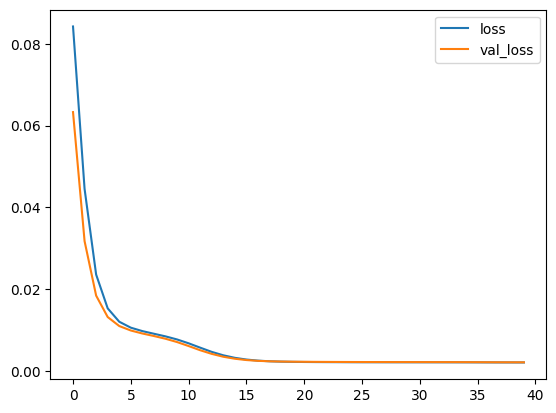

In [83]:
# Se extrae el historial de error contra iteraciones de la clase
loss_df = pd.DataFrame(losses.history)
# Se grafica
loss_df.loc[:, ['loss', 'val_loss']].plot()
# Y se pide que se muestre la ventana en que se graficó
plt.show()

In [84]:
# Se eligen 10 datos al azar
dato = dataset.sample(frac=10/dataset.shape[0])
datoPrueba = dato.drop(columns=["Price"])
# Y se predice el precio que tendría, luego de
# revertir la normalización
precio = network.predict(datoPrueba)
print("Dato ingresado:")
print(dato*range+ min_val) # Se normalizan los datos
dato["Price"] = precio
print("Estimación: ")
print(dato*range+ min_val)

1/1 [==============================] - 0s 81ms/step
Dato ingresado:
      Duration  Total_Stops    Price
3996    1035.0          2.0  16057.0
9443     765.0          1.0   7480.0
2499     650.0          1.0  15342.0
8436    1580.0          2.0  13381.0
1950     400.0          1.0  14781.0
7857     480.0          1.0   6883.0
5571     360.0          1.0  14714.0
9266     400.0          1.0  22270.0
7900     165.0          0.0   5823.0
5963     140.0          0.0   6300.0
Estimación: 
      Duration  Total_Stops         Price
3996    1035.0          2.0  12734.090666
9443     765.0          1.0  10779.733438
2499     650.0          1.0  10618.125883
8436    1580.0          2.0  12199.363192
1950     400.0          1.0   9715.875156
7857     480.0          1.0  10040.404709
5571     360.0          1.0   9557.876091
9266     400.0          1.0   9715.875156
7900     165.0          0.0   5141.216879
5963     140.0          0.0   5096.377803


In [85]:
from ann_visualizer.visualize import ann_viz;
#Build your model here
ann_viz(network)